# import stuff


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from func import  df_load, get_creation_time, remove_columns, get_salary
import Levenshtein


In [64]:
pd.set_option('display.max_columns', None)

In [65]:
dfs=df_load('data')
for name, df in dfs.items():
    globals()[name] = df
    remove_columns(df)
    print(name)
    # print(df.columns)
    

employees
hubspot_sales_pipeline_stages
notion_clients
notion_hr
notion_roles
projects
fortnox_invoices
fortnox_supplier_invoices
hubspot_deals
time_entries
qbis__activity_time
qbis__project_activities


# levenshtein stuff

In [66]:
employees['consultant_name_anon']=employees['first_name']+' '+employees['last_name']

In [67]:
rename_dict={
'Sila Rofat Faircloth': 'Jacqueline Harpman',
'Gunnar Gunnarsson' : 'Marlen Haushofer',
'Gabriel Lennartsson' : 'Haruki Taleb'}


In [68]:
employees['consultant_name_anon']=employees['consultant_name_anon'].replace(rename_dict)

In [69]:
for i in employees['consultant_name_anon']:
    min_dist=100
    closest_name=''
    for e in notion_hr['consultant_name_anon']:    
        x= Levenshtein.distance(i,e)
        if x<min_dist:
            min_dist=x
            closest_name=e
    if min_dist<3:
        employees.loc[employees['consultant_name_anon']==i,'notion_name']=closest_name
        print(f'{i} with {closest_name} {min_dist}')


Luke Rhinehart with Luke Rhinehart 0
Alexander Macedon with Alexander Macedon 0
Rachel Lamb with Rachel Lamb 0
Bingo Storm with Bingo Storm 0
Astarion Baldersson with Astarion Baldursson 1
Erroll Datasson with Erroll Datasson 0
Jacqueline Harpman with Jacqueline Harpman 0
Bertil Grindd with Bertil Grind 1
ilya Altman with Ilya Altman 1
Marlen Haushofer with Marlen Haushofer 0
Dag Ström with Dag Ström 0
Jana Bjork with Jana Björk 1
Haruki Taleb with Haruki Taleb 0


# merging stuff

In [70]:
# employees
hubspot_sales_pipeline_stages
# notion_clients
# notion_hr
# notion_roles
# projects
fortnox_invoices
fortnox_supplier_invoices
hubspot_deals
# time_entries
# qbis__activity_time
# qbis__project_activities

,deal_id,deal_amount,deal_stage,deal_close_probability,create_date,last_modified_date,close_date,owner_id,weighted_deal_amount,deal_name_anon
0,12204336178,1000000.0,closedlost,0.0,2023-02-17 15:36:41.602000 UTC,2023-03-17 10:52:17.288000 UTC,2023-02-27 11:15:06.295000 UTC,184321862,0.0,Dometic - Data Solution Architect role
1,15856959370,1000000.0,closedlost,0.0,2023-10-31 08:43:47.711000 UTC,2023-11-17 09:41:31.071000 UTC,2023-11-17 09:41:30.971000 UTC,184321862,0.0,"Morris, Juarez and Chavez - Optimize delivery ..."
2,18757261362,1200000.0,closedlost,0.0,2024-04-19 12:24:49.100000 UTC,2024-05-17 12:08:02.490000 UTC,2024-05-17 12:07:46.527000 UTC,184321862,0.0,ICA Banken GCP Architect
3,17014095971,1000000.0,closedlost,0.0,2024-01-18 10:32:41.435000 UTC,2024-02-23 08:12:52.206000 UTC,2024-02-23 08:12:46.209000 UTC,184321862,0.0,"Morris, Juarez and Chavez Miller, Kidd and Dic..."
4,20551258523,600000.0,closedlost,0.0,2024-07-05 13:08:26.064000 UTC,2024-12-13 13:18:34.627000 UTC,2024-12-13 13:18:30.146000 UTC,184321862,0.0,"Morris, Juarez and Chavez AI opportunities"
...,...,...,...,...,...,...,...,...,...,...
317,38844956688,1000000.0,1102499,0.2,2025-06-13 12:52:19.219000 UTC,2025-06-13 12:52:40.884000 UTC,2025-07-13 12:51:32.691000 UTC,649695874,200000.0,"Förlängning Harris, Watson and Donaldson"
318,19430316661,600000.0,closedwon,1.0,2024-05-17 08:32:43.729000 UTC,2024-05-24 08:15:09.391000 UTC,2024-05-24 08:09:33.933000 UTC,649695874,600000.0,"Lee, Freeman and Jones - Miller, Kidd and Dickson"
319,19752940625,900000.0,closedwon,1.0,2024-05-31 12:31:56.244000 UTC,2024-06-20 12:31:07.700000 UTC,2024-06-20 12:31:05.382000 UTC,649695874,900000.0,Joseph and Sons - Emma
320,22362940782,1800000.0,closedwon,1.0,2024-09-17 13:07:37.372000 UTC,2024-10-18 11:54:05.160000 UTC,2024-10-18 11:54:01.072000 UTC,649695874,1800000.0,"Harris, Watson and Donaldson - öppna data"


In [71]:
emp_notion=pd.merge(employees,notion_hr,left_on='notion_name',right_on='consultant_name_anon',how='outer',suffixes=['_emp','_notion']).sort_values('employee_id').reset_index(drop=True)

In [72]:
not_client_role=pd.merge(notion_clients,notion_roles,right_on='name_anon',left_on='name_anon',how='left')

In [73]:
notion_roles['role_category_name'].unique()

array([nan, 'Data Analyst', 'Data Engineer', 'Business Developer',
       'Data Scientist', 'Analytics Engineer', 'Data Architect'],
      dtype=object)

In [74]:
map_prac_to_role={
    'Analytics':'Data Analyst', 
    'Business':'Business Developer', 
    'Data':'Data Scientist',
    np.nan : np.nan }

In [75]:
map_role_to_practice={
    'Data Analyst':'Analytics', 
    'Data Engineer':'Data', 
    'Business Developer':'Business',
    'Data Scientist':'Data', 
    'Analytics Engineer':'Analytics', 
    'Data Architect':'Data',
    np.nan : np.nan }

In [76]:
emp_notion['practice'].unique()

array(['Analytics', 'Business', 'Data', nan], dtype=object)

In [77]:
emp_notion.drop(columns=['last_name','first_name','notion_name'],inplace=True)

In [78]:
qbis_activity_proj_time=pd.merge(qbis__activity_time,qbis__project_activities,left_on='activity_id',right_on='project_activity_id',how='left')
qbis_activity_proj_time_emp=pd.merge(qbis_activity_proj_time,emp_notion,left_on='employee_id',right_on='employee_id',how='left')
qbis_activity_proj_time_emp['hours']=qbis_activity_proj_time_emp['minutes']/60

In [79]:
qbis_activity_proj_time_emp['role_category_name']=qbis_activity_proj_time_emp['practice'].map(map_prac_to_role)


In [80]:
qbis_activity_proj_time_emp

,activity_time_id,employee_id,activity_id,activity_date,minutes,factor_value,notes_internal,project_activity_id,project_id,activity_name,is_active,is_complete,is_chargeable,factor,employee_code,practice,consultant_name_anon_emp,consultant_id,active,startdate,seniority,consultant_name_anon_notion,hours,role_category_name
0,750,5,20,2025-05-10,0,0.0,Data Innovation Summit + Interna möten fredag,20,19,Internal,True,False,False,0.0,5,Analytics,Erroll Datasson,348c564a-f3b1-42f9-95e5-cd6a9ca66aa7,Yes,2020-10-01,K4,Erroll Datasson,0.0,Data Analyst
1,1256,3,17,2025-06-26,30,1.0,NaN,17,16,Konsulttjänster,True,False,True,1.0,20,Business,Bertil Grindd,2a554628-d7f2-475f-8872-5a7057388c36,No,2024-08-19,K2,Bertil Grind,0.5,Business Developer
2,1255,3,17,2025-06-25,30,1.0,NaN,17,16,Konsulttjänster,True,False,True,1.0,20,Business,Bertil Grindd,2a554628-d7f2-475f-8872-5a7057388c36,No,2024-08-19,K2,Bertil Grind,0.5,Business Developer
3,1257,3,17,2025-06-27,30,1.0,NaN,17,16,Konsulttjänster,True,False,True,1.0,20,Business,Bertil Grindd,2a554628-d7f2-475f-8872-5a7057388c36,No,2024-08-19,K2,Bertil Grind,0.5,Business Developer
4,1564,3,21,2025-08-21,30,1.0,NaN,21,20,Data Strategi Support,True,False,True,1.0,20,Business,Bertil Grindd,2a554628-d7f2-475f-8872-5a7057388c36,No,2024-08-19,K2,Bertil Grind,0.5,Business Developer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,230,4,14,2025-04-02,540,1.0,NaN,14,13,Konsulttjänster,True,False,True,1.0,19,Business,Marlen Haushofer,61948bc5-3844-4219-a605-94e22f59571a,Yes,2023-12-01,K3,Marlen Haushofer,9.0,Business Developer
862,222,4,14,2025-04-07,540,1.0,NaN,14,13,Konsulttjänster,True,False,True,1.0,19,Business,Marlen Haushofer,61948bc5-3844-4219-a605-94e22f59571a,Yes,2023-12-01,K3,Marlen Haushofer,9.0,Business Developer
863,209,4,14,2025-04-22,600,1.0,NaN,14,13,Konsulttjänster,True,False,True,1.0,19,Business,Marlen Haushofer,61948bc5-3844-4219-a605-94e22f59571a,Yes,2023-12-01,K3,Marlen Haushofer,10.0,Business Developer
864,210,4,14,2025-04-23,600,1.0,NaN,14,13,Konsulttjänster,True,False,True,1.0,19,Business,Marlen Haushofer,61948bc5-3844-4219-a605-94e22f59571a,Yes,2023-12-01,K3,Marlen Haushofer,10.0,Business Developer


In [81]:
qbis_activity_proj_time_emp=get_salary(qbis_activity_proj_time_emp,'hours')

In [82]:
pro_not_clients=pd.merge(projects,not_client_role,left_on='client_anon',right_on='name_anon',how='left')

# there are no stupid questions, just stupid students

# adding columns

In [83]:
pro_not_clients['practice']=pro_not_clients['role_category_name'].map(map_role_to_practice)

In [84]:
pro_not_clients

,project_id,client_id_x,clockify_project_billable,project_duration,estimated_durationn,client_anon,project_anon,client_id_y,category,industry_id,company_size,company_type,n_roles,n_projects,n_people,started_at,name_anon,role_id,industry_name,role_category_name,hourly_rate,billing_type,seniority,startdate,practice
0,5f60a92df2bfed445099122e,5f437b54d13ed94468add358,False,232H,Not estimated,"Taylor, Simmons and Anderson",Obetald semester,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65a66b6f7349ba6dbd1f1086,5f437b54d13ed94468add358,False,414H,Not estimated,"Taylor, Simmons and Anderson","Brown, Martinez and Manning Projects",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f437f189decb91192e37bc0,5f437b54d13ed94468add358,False,10321H,Not estimated,"Taylor, Simmons and Anderson",Semester,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6179a9ac4d694b7ecbe75ea6,5f437b54d13ed94468add358,False,396H,Not estimated,"Taylor, Simmons and Anderson",Vård av barn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,65a66b65efacdd3a4371df50,5f437b54d13ed94468add358,False,52H,Not estimated,"Taylor, Simmons and Anderson",Competence development,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,6715f9d290254d10ca81e784,6715f9ce898fb011477dec07,True,994H,Not estimated,"Harris, Watson and Donaldson",Data Specialist,11bb42da-30b3-80f6-8dcb-f3a53720ddf4,Clients,NaN,NaN,NaN,2.0,1.0,1.0,2024-10-14,"Harris, Watson and Donaldson",db6a818f-f08d-489d-a6aa-873e24546ba1,NaN,Business Developer,1025.0,Billing to Emagine,K3,2024-10-14,Business
363,671fe491605d557fc53c80f3,671fe472a75c3e4ef3b541e8,True,924H,Not estimated,"Reed, Berry and Wilkins",Enterprise Peters and Sons,11ab42da-30b3-80ab-b07d-fb72bc3aafc0,Clients,778f29ec-9e94-4438-81ac-a85c7022b22f,>250,Public,1.0,1.0,1.0,2024-10-14,"Reed, Berry and Wilkins",11ab42da-30b3-80b5-ac96-eec9c622e60d,Financial Services,Data Architect,1080.0,Self billing,K3,2024-10-14,Data
364,677fb4341c567d719ff4f8bd,677fb4321c567d719ff4f866,True,39H,Not estimated,"Rivera, Davis and Roberts",WoW DS & Analytics team,185b42da-30b3-8079-bbc0-fa474b9b34cc,NaN,NaN,NaN,NaN,1.0,1.0,0.0,2025-01-23,"Rivera, Davis and Roberts",185b42da-30b3-80a5-80e2-c0c94e9cf650,NaN,Business Developer,1500.0,TekSystems,K3,2025-01-23,Business
365,679b93d05d710856f30c8495,679b93c45d710856f30c8295,True,115H,Not estimated,Ward and Sons,Geo Opp. Ass.,185b42da-30b3-806b-b7bc-dbe985651461,Clients,e29e5c7f-8323-40ac-9560-b78f22844018,25-249,Private,2.0,1.0,0.0,2025-02-05,Ward and Sons,185b42da-30b3-801f-b838-e6cb1a78d1e8,Construction and Real Estate,Business Developer,NaN,NaN,K2,2025-02-05,Business


In [85]:
pro_not_clients["creation_time_client"] = pro_not_clients.iloc[:,1].apply(get_creation_time)
pro_not_clients["creation_time_pro"] = pro_not_clients.iloc[:,0].apply(get_creation_time)

In [86]:
pro_not_clients['startdate'] = pro_not_clients['startdate'].fillna(pro_not_clients[ 'creation_time_pro'].dt.date)

In [87]:
time_pro_not_clients=pd.merge(time_entries,pro_not_clients,left_on='project_id',right_on='project_id',how='left')

In [88]:
ran=np.random.randint(0,len(time_pro_not_clients),1)[0]
time_pro_not_clients.iloc[ran:ran+10]

,dt,time_entry_id,project_id,user_id,billable,hours,billable_hours,client_id_x,clockify_project_billable,project_duration,estimated_durationn,client_anon,project_anon,client_id_y,category,industry_id,company_size,company_type,n_roles,n_projects,n_people,started_at,name_anon,role_id,industry_name,role_category_name,hourly_rate,billing_type,seniority,startdate,practice,creation_time_client,creation_time_pro
24680,2020-10-08,5fbe1c25ce554c4e61d15813,5f437b18d13ed94468add25e,5f437ae67d26442bf5452ecd,True,8.0,8.0,5f437b119decb91192e3696c,True,3027H,Not estimated,"Fernandez, Brewer and Vasquez",Datadriven produktion,7fa223a8-390d-4d99-8766-51d0c87726bb,Clients,bd0cfcaf-af99-43d4-ba60-13c50a85e0a4,>250,Public,0.0,1.0,0.0,NaN,"Fernandez, Brewer and Vasquez",NaN,NaN,NaN,NaN,NaN,NaN,2020-08-24,NaN,2020-08-24 08:32:17,2020-08-24 08:32:24
24681,2020-10-08,5f87f0ccd0c0ad474d6a7ea2,5f437b18d13ed94468add25e,5f437e3d9decb91192e3784a,True,8.0,8.0,5f437b119decb91192e3696c,True,3027H,Not estimated,"Fernandez, Brewer and Vasquez",Datadriven produktion,7fa223a8-390d-4d99-8766-51d0c87726bb,Clients,bd0cfcaf-af99-43d4-ba60-13c50a85e0a4,>250,Public,0.0,1.0,0.0,NaN,"Fernandez, Brewer and Vasquez",NaN,NaN,NaN,NaN,NaN,NaN,2020-08-24,NaN,2020-08-24 08:32:17,2020-08-24 08:32:24
24682,2020-10-08,5f7f0e78e0077548c6911209,5f68f9ef5d3b7b2b1d6318e1,5f68ec6a633ecf60f5e863ce,True,9.0,9.0,5f68ec2f5d3b7b2b1d62ee6a,True,1313H,Not estimated,"Rice, Strickland and Soto",Head of Data Services,13a63062-a24e-4b96-b989-ac57809ff3e4,Clients,778f29ec-9e94-4438-81ac-a85c7022b22f,25-249,Public,1.0,0.0,0.0,2020-10-01,"Rice, Strickland and Soto",d89381f6-baf2-4022-8df1-7fae7fa7ea79,Financial Services,Business Developer,1300.0,NaN,K4,2020-10-01,Business,2020-09-21 18:08:47,2020-09-21 19:07:27
24683,2020-10-07,5fbe1c258b85c54334b059a8,5f437b18d13ed94468add25e,5f437ae67d26442bf5452ecd,True,8.0,8.0,5f437b119decb91192e3696c,True,3027H,Not estimated,"Fernandez, Brewer and Vasquez",Datadriven produktion,7fa223a8-390d-4d99-8766-51d0c87726bb,Clients,bd0cfcaf-af99-43d4-ba60-13c50a85e0a4,>250,Public,0.0,1.0,0.0,NaN,"Fernandez, Brewer and Vasquez",NaN,NaN,NaN,NaN,NaN,NaN,2020-08-24,NaN,2020-08-24 08:32:17,2020-08-24 08:32:24
24684,2020-10-07,5f87f0cbade2b365fe6c990e,5f437b18d13ed94468add25e,5f437e3d9decb91192e3784a,True,8.0,8.0,5f437b119decb91192e3696c,True,3027H,Not estimated,"Fernandez, Brewer and Vasquez",Datadriven produktion,7fa223a8-390d-4d99-8766-51d0c87726bb,Clients,bd0cfcaf-af99-43d4-ba60-13c50a85e0a4,>250,Public,0.0,1.0,0.0,NaN,"Fernandez, Brewer and Vasquez",NaN,NaN,NaN,NaN,NaN,NaN,2020-08-24,NaN,2020-08-24 08:32:17,2020-08-24 08:32:24
24685,2020-10-07,5f7e0be72bcbc7438ea3079a,5f68f9ef5d3b7b2b1d6318e1,5f68ec6a633ecf60f5e863ce,True,8.0,8.0,5f68ec2f5d3b7b2b1d62ee6a,True,1313H,Not estimated,"Rice, Strickland and Soto",Head of Data Services,13a63062-a24e-4b96-b989-ac57809ff3e4,Clients,778f29ec-9e94-4438-81ac-a85c7022b22f,25-249,Public,1.0,0.0,0.0,2020-10-01,"Rice, Strickland and Soto",d89381f6-baf2-4022-8df1-7fae7fa7ea79,Financial Services,Business Developer,1300.0,NaN,K4,2020-10-01,Business,2020-09-21 18:08:47,2020-09-21 19:07:27
24686,2020-10-06,5fbe1c2533c56544fdfd6cc5,5f437b18d13ed94468add25e,5f437ae67d26442bf5452ecd,True,8.0,8.0,5f437b119decb91192e3696c,True,3027H,Not estimated,"Fernandez, Brewer and Vasquez",Datadriven produktion,7fa223a8-390d-4d99-8766-51d0c87726bb,Clients,bd0cfcaf-af99-43d4-ba60-13c50a85e0a4,>250,Public,0.0,1.0,0.0,NaN,"Fernandez, Brewer and Vasquez",NaN,NaN,NaN,NaN,NaN,NaN,2020-08-24,NaN,2020-08-24 08:32:17,2020-08-24 08:32:24
24687,2020-10-06,5f87f0caade2b365fe6c9900,5f437b18d13ed94468add25e,5f437e3d9decb91192e3784a,True,8.0,8.0,5f437b119decb91192e3696c,True,3027H,Not estimated,"Fernandez, Brewer and Vasquez",Datadriven produktion,7fa223a8-390d-4d99-8766-51d0c87726bb,Clients,bd0cfcaf-af99-43d4-ba60-13c50a85e0a4,>250,Public,0.0,1.0,0.0,NaN,"Fernandez, Brewer and Vasquez",NaN,NaN,NaN,NaN,NaN,NaN,2020-08-24,NaN,2020-08-24 08:32:17,2020-08-24 08:32:24
24688,202

In [89]:
time_pro_not_clients['dt']=pd.to_datetime(time_pro_not_clients['dt'])
time_pro_not_clients["startdate"]=pd.to_datetime(time_pro_not_clients["startdate"])

In [90]:
time_pro_not_clients_cleaner=time_pro_not_clients[time_pro_not_clients["dt"] >= time_pro_not_clients["startdate"]]

In [91]:
time_pro_not_clients_cleaner['missing_hourly_rate']=time_pro_not_clients_cleaner['hourly_rate'].isna()
time_pro_not_clients_cleaner['missing_seniority']=time_pro_not_clients_cleaner['seniority'].isna()
time_pro_not_clients_cleaner['missing_role_category_name']=time_pro_not_clients_cleaner['role_category_name'].isna()

C:\Users\owahl\AppData\Local\Temp\ipykernel_27040\4269809870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_pro_not_clients_cleaner['missing_hourly_rate']=time_pro_not_clients_cleaner['hourly_rate'].isna()
C:\Users\owahl\AppData\Local\Temp\ipykernel_27040\4269809870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_pro_not_clients_cleaner['missing_seniority']=time_pro_not_clients_cleaner['seniority'].isna()
C:\Users\owahl\AppData\Local\Temp\ipykernel_27040\4269809870.py:3: SettingWithCopyWa

## filling in NA's

<Axes: xlabel='seniority'>

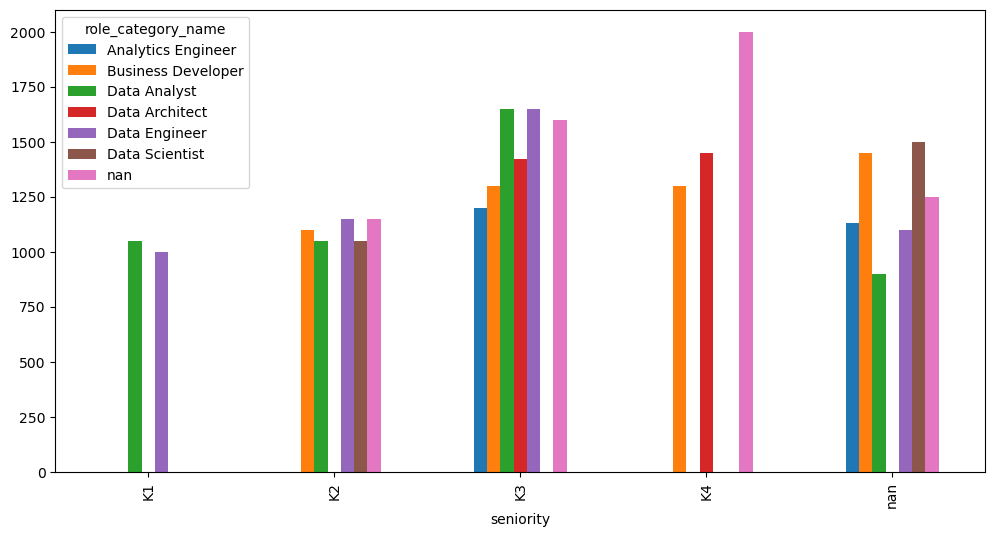

In [92]:
time_pro_not_clients.groupby(['seniority','role_category_name'],dropna=False)['hourly_rate'].median().unstack().plot(kind='bar',figsize=(12,6))

<Axes: xlabel='seniority'>

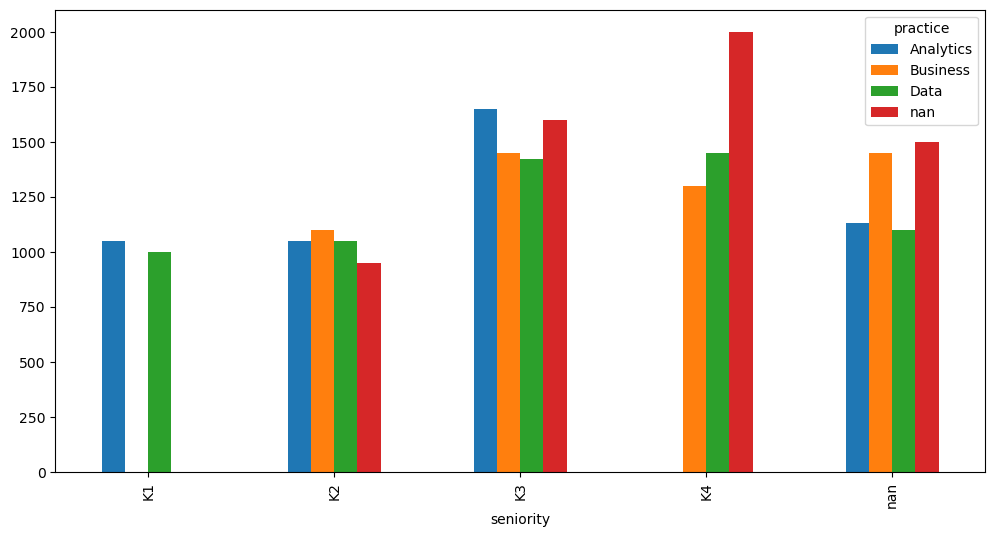

In [93]:
time_pro_not_clients_cleaner.groupby(['seniority','practice'],dropna=False)['hourly_rate'].median().unstack().plot(kind='bar',figsize=(12,6))

<Axes: xlabel='seniority'>

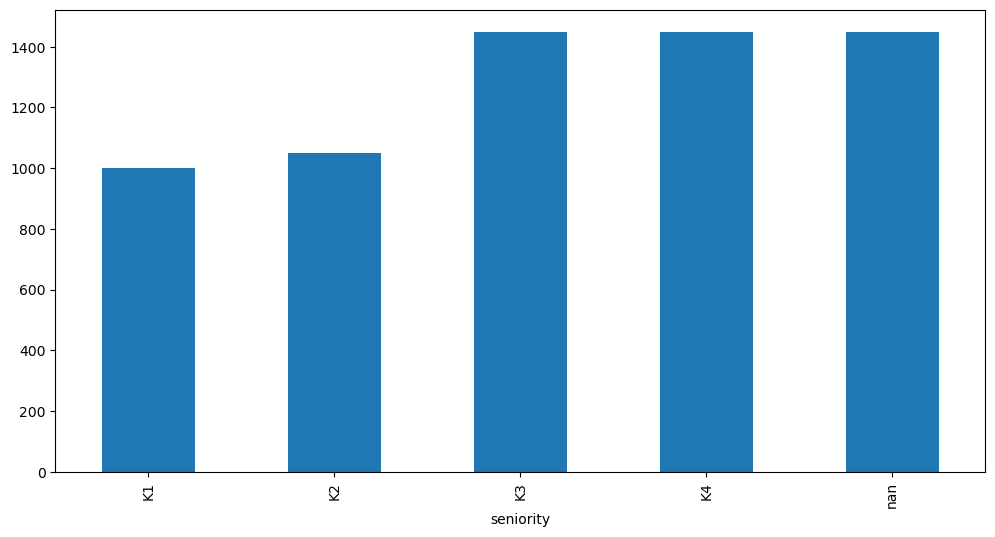

In [94]:
time_pro_not_clients_cleaner.groupby('seniority',dropna=False)['hourly_rate'].median().plot(kind='bar',figsize=(12,6))

In [95]:
df = time_pro_not_clients_cleaner.copy()
mask = df['seniority'].notna() & df['role_category_name'].notna()
group_medians_time = df[mask].groupby(['seniority', 'role_category_name'])['hourly_rate'].transform('median')
df.loc[mask, 'hourly_rate'] = df.loc[mask, 'hourly_rate'].fillna(group_medians_time)

group_medians_qbis=df.groupby(['seniority', 'practice'],dropna=False)['hourly_rate'].transform('median')
qbis_activity_proj_time_emp['hourly_rate'] = np.nan
qbis_activity_proj_time_emp['hourly_rate'] =qbis_activity_proj_time_emp['hourly_rate'].fillna(group_medians_qbis)
# Step 2: recompute medians at the seniority level
seniority_medians = df.groupby('seniority')['hourly_rate'].median()
df['hourly_rate'] = df['hourly_rate'].fillna(df['seniority'].map(seniority_medians))
qbis_activity_proj_time_emp['hourly_rate'] = qbis_activity_proj_time_emp['hourly_rate'].fillna(qbis_activity_proj_time_emp['seniority'].map(seniority_medians))
# Step 3: fill remaining NaNs with overall median
overall_median = df['hourly_rate'].median()
mask=df['hourly_rate'].isna() & df['billable']
df.loc[mask,'hourly_rate'] = df.loc[mask,'hourly_rate'].fillna(overall_median)


In [96]:
time_pro_not_clients_cleaner2=df

In [97]:
time_pro_not_clients_cleaner2=time_pro_not_clients_cleaner2.reset_index(drop=True)
time_pro_not_clients_cleaner2=get_salary(time_pro_not_clients_cleaner2,'hours')

In [98]:
time_pro_not_clients_cleaner2['k_level']=np.nan
time_pro_not_clients_cleaner2['k_level']=time_pro_not_clients_cleaner2['seniority'].str[-1]

In [99]:
time_pro_not_clients_cleaner3=pd.merge(time_pro_not_clients_cleaner2,time_pro_not_clients_cleaner2.groupby('time_entry_id')['project_id'].count(),left_on='time_entry_id',right_on='time_entry_id',how='left',suffixes=['','_count'])

# money to consults

80% with clients

k1= 250                         = 41750 kr/month

k2= 250 + 50  per billed hour   = 48400 kr/month

k3= 250 + 120 per billed hour   = 57710 kr/month

k4= 250 + 220 per billed hour   = 70050 kr/month

# select what we wany in the combiend dataset

In [100]:
qbis_activity_proj_time_emp['k_level']=np.nan
qbis_activity_proj_time_emp['k_level']=qbis_activity_proj_time_emp['seniority'].str[-1]

In [101]:
qbis_merge=qbis_activity_proj_time_emp[['activity_time_id','employee_id','project_id','hours','role_category_name','activity_name', 'base_salary', 'per_hour_salary', 'salary','social_fees', 'total_cost', 'hourly_rate','is_chargeable','activity_date','k_level','practice']]

In [102]:
rename_col_dict={
    'is_chargeable':'billable',
    'activity_date':'dt',
    'employee_id':'user_id',
    'activity_time_id':'time_entry_id',
    'activity_name':'project_anon'}

In [103]:
for col in qbis_merge.columns:
    if col in rename_col_dict:
        qbis_merge.rename(columns={col:rename_col_dict[col]},inplace=True)

C:\Users\owahl\AppData\Local\Temp\ipykernel_27040\3088868279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbis_merge.rename(columns={col:rename_col_dict[col]},inplace=True)


In [104]:
qbis_merge['source']='qbis'
qbis_merge['k_level'] = pd.to_numeric(qbis_merge['k_level'], errors='coerce')

C:\Users\owahl\AppData\Local\Temp\ipykernel_27040\1588641383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbis_merge['source']='qbis'
C:\Users\owahl\AppData\Local\Temp\ipykernel_27040\1588641383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbis_merge['k_level'] = pd.to_numeric(qbis_merge['k_level'], errors='coerce')


In [105]:
time_merge=time_pro_not_clients_cleaner3[['time_entry_id','user_id','dt', 'project_id','billable','hours','project_anon','role_category_name','hourly_rate','seniority','startdate', 'practice', 'base_salary', 'per_hour_salary','salary', 'social_fees', 'total_cost', 'k_level', 'project_id_count']]


In [106]:

for role in ['Business Developer', 'Data Architect', 'Data Engineer','Data Scientist', 'Analytics Engineer', 'Data Analyst']:
    time_merge[f"is_{role.replace(' ', '_').lower()}"] = np.where(time_merge['role_category_name'] == role, 1, np.nan)

C:\Users\owahl\AppData\Local\Temp\ipykernel_27040\3441676281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_merge[f"is_{role.replace(' ', '_').lower()}"] = np.where(time_merge['role_category_name'] == role, 1, np.nan)
C:\Users\owahl\AppData\Local\Temp\ipykernel_27040\3441676281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_merge[f"is_{role.replace(' ', '_').lower()}"] = np.where(time_merge['role_category_name'] == role, 1, np.nan)
C:\Users\owahl\AppData\Local\Temp\ipykernel_27040\344167

In [107]:
time_merge['k_level'] = pd.to_numeric(time_merge['k_level'], errors='coerce')
time_merge['source']='time'

C:\Users\owahl\AppData\Local\Temp\ipykernel_27040\666871145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_merge['k_level'] = pd.to_numeric(time_merge['k_level'], errors='coerce')
C:\Users\owahl\AppData\Local\Temp\ipykernel_27040\666871145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_merge['source']='time'


In [108]:
time_merge.fillna({'practice':'unknown'},inplace=True)

C:\Users\owahl\AppData\Local\Temp\ipykernel_27040\3938327502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_merge.fillna({'practice':'unknown'},inplace=True)


In [109]:
time_merge.groupby('time_entry_id')[['dt','source','user_id','billable','project_id','practice']].max().reset_index()

,time_entry_id,dt,source,user_id,billable,project_id,practice
0,5f437b2a7d26442bf5452ff8,2020-08-24,time,5f437ae67d26442bf5452ecd,True,5f437b18d13ed94468add25e,unknown
1,5f437b2b9decb91192e369d9,2020-08-25,time,5f437ae67d26442bf5452ecd,True,5f437b18d13ed94468add25e,unknown
2,5f437b2b9decb91192e369dd,2020-08-26,time,5f437ae67d26442bf5452ecd,True,5f437b18d13ed94468add25e,unknown
3,5f437b2c7d26442bf5452ffe,2020-08-27,time,5f437ae67d26442bf5452ecd,True,5f437b18d13ed94468add25e,unknown
4,5f438109d13ed94468adec61,2020-08-28,time,5f437ae67d26442bf5452ecd,True,5f437b18d13ed94468add25e,unknown
...,...,...,...,...,...,...,...
9592,68146648e39e7e7924eb63a2,2025-04-29,time,5f68ec6a633ecf60f5e863ce,True,66f65d6c76257e3e51f9afc4,unknown
9593,6814664a65a9a8260339116f,2025-04-30,time,5f68ec6a633ecf60f5e863ce,True,66f65d6c76257e3e51f9afc4,unknown
9594,681474ec43b8e02338ac9224,2025-04-28,time,640f2ad98c3e1105ccb78609,True,66c73f7caf3a79534feebd76,unknown
9595,68147505b2fa1e03b7b3c41e,2025-04-29,time,640f2ad98c3e1105ccb78609,True,66c73f7caf3a79534feebd76,unknown


In [110]:
time_merge2=pd.merge(time_merge.groupby('time_entry_id')[['dt','source','user_id','project_id','project_anon','practice']].max().reset_index()
                     ,time_merge.groupby('time_entry_id').mean(numeric_only=True).reset_index(),on='time_entry_id')

In [111]:

for role in ['Business Developer', 'Data Architect', 'Data Engineer','Data Scientist', 'Analytics Engineer', 'Data Analyst']:
    qbis_merge[f"is_{role.replace(' ', '_').lower()}"] = np.where(qbis_merge['role_category_name'] == role, 1, np.nan)

C:\Users\owahl\AppData\Local\Temp\ipykernel_27040\1959101151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbis_merge[f"is_{role.replace(' ', '_').lower()}"] = np.where(qbis_merge['role_category_name'] == role, 1, np.nan)
C:\Users\owahl\AppData\Local\Temp\ipykernel_27040\1959101151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbis_merge[f"is_{role.replace(' ', '_').lower()}"] = np.where(qbis_merge['role_category_name'] == role, 1, np.nan)
C:\Users\owahl\AppData\Local\Temp\ipykernel_27040\195910

In [112]:
time_qbis_merge=pd.concat([time_merge2,qbis_merge],ignore_index=True)

In [113]:
time_qbis_merge.fillna({'project_id_count':1},inplace=True)

In [114]:
remap_work={
    'Semester':'absence_time', 
    'Obetald semester': 'absence_time',
    'Föräldraledighet':'absence_time',
    'Vård av barn':'absence_time',
    'Sjuk':'absence_time',
    'Interntid' :'internal_time',
    'Brown, Martinez and Manning Projects':'internal_time',
    'Competence development':'internal_time', 
    'Internal':'internal_time'}

In [115]:
time_qbis_merge['work_type']=time_qbis_merge['project_anon'].map(remap_work)
time_qbis_merge['work_type']=time_qbis_merge['work_type'].fillna('client_work')

# merge fortknox data

In [116]:
fortnox_invoices

,invoice_amount_net,invoice_amount_total,customer_number,due_date,invoice_date,final_pay_date,month_name,accounting_month,accounting_year,accounting_year_date,broker,client_anon
0,52000.0,65000.0,559296,2024-10-15,2024-09-30,NaN,September,5,2024,2024-05-28,NaN,"Mccoy, Singh and Smith"
1,136500.0,170625.0,559298,2024-12-04,2024-11-04,2024-12-04,November,7,2024,2024-07-04,NaN,"Atkinson, Bishop and Cohen"
2,192000.0,240000.0,559298,2025-01-01,2024-11-30,2024-12-30,November,7,2024,2024-07-28,NaN,"Atkinson, Bishop and Cohen"
3,133500.0,166875.0,559298,2025-02-02,2024-12-31,2025-01-31,December,8,2024,2024-08-28,NaN,"Atkinson, Bishop and Cohen"
4,212800.0,266000.0,559298,2025-03-05,2025-01-31,2025-03-05,January,9,2024,2024-09-28,NaN,"Atkinson, Bishop and Cohen"
...,...,...,...,...,...,...,...,...,...,...,...,...
610,152000.0,190000.0,559290,2025-03-05,2025-01-31,2025-03-14,January,9,2024,2024-09-28,Partner,Ali-Lawrence
611,160000.0,200000.0,559290,2025-04-03,2025-02-28,2025-04-08,February,10,2024,2024-10-28,Partner,Ali-Lawrence
612,160000.0,200000.0,559290,2025-04-30,2025-03-31,2025-05-09,March,11,2024,2024-11-28,Partner,Ali-Lawrence
613,128000.0,160000.0,559290,2025-06-05,2025-04-30,2025-06-12,April,12,2024,2024-12-28,Partner,Ali-Lawrence


In [117]:
fortnox_invoices.drop(columns=['accounting_month','accounting_year','month_name'],inplace=True)

In [122]:
fortnox_invoices['source']='revenue'

In [119]:
fortnox_supplier_invoices.rename(columns={'invoice_payment':'invoice_amount_total','categorization':'customer_number'},inplace=True)


In [123]:
fortnox_supplier_invoices['source']='cost'

In [503]:
x=np.random.randint(1,len(fortnox_supplier_invoices),1)[0]
fortnox_supplier_invoices[x:x+10]

,invoice_amount_total,customer_number,invoice_date,due_date,final_pay_date,source
735,105000.0,rental_costs,2022-06-10,2022-06-30,2022-06-28,cost
736,105000.0,rental_costs,2022-09-05,2022-09-30,2022-09-27,cost
737,105000.0,web_page_design_costs,2021-11-01,2021-11-16,2021-11-25,cost
738,195000.0,rental_costs,2023-06-13,2023-06-30,2023-06-26,cost
739,195000.0,rental_costs,2023-03-09,2023-03-31,2023-04-03,cost
740,195000.0,rental_costs,2022-11-29,2022-12-29,2022-12-30,cost
741,253361.0,Other,2024-08-01,2024-08-30,2024-09-12,cost
742,253361.0,Other,2024-03-07,2024-03-28,2024-03-28,cost
743,253361.0,Other,2023-12-07,2023-12-29,2023-12-29,cost
744,253361.0,Other,2024-09-11,2024-09-30,2024-09-30,cost


In [ ]:
fortnox_invoices

,invoice_amount_net,invoice_amount_total,customer_number,due_date,invoice_date,final_pay_date,accounting_year_date,broker,client_anon,source
0,52000.0,65000.0,559296,2024-10-15,2024-09-30,NaN,2024-05-28,NaN,"Mccoy, Singh and Smith",revenue
1,136500.0,170625.0,559298,2024-12-04,2024-11-04,2024-12-04,2024-07-04,NaN,"Atkinson, Bishop and Cohen",revenue
2,192000.0,240000.0,559298,2025-01-01,2024-11-30,2024-12-30,2024-07-28,NaN,"Atkinson, Bishop and Cohen",revenue
3,133500.0,166875.0,559298,2025-02-02,2024-12-31,2025-01-31,2024-08-28,NaN,"Atkinson, Bishop and Cohen",revenue
4,212800.0,266000.0,559298,2025-03-05,2025-01-31,2025-03-05,2024-09-28,NaN,"Atkinson, Bishop and Cohen",revenue
...,...,...,...,...,...,...,...,...,...,...
610,152000.0,190000.0,559290,2025-03-05,2025-01-31,2025-03-14,2024-09-28,Partner,Ali-Lawrence,revenue
611,160000.0,200000.0,559290,2025-04-03,2025-02-28,2025-04-08,2024-10-28,Partner,Ali-Lawrence,revenue
612,160000.0,200000.0,559290,2025-04-30,2025-03-31,2025-05-09,2024-11-28,Partner,Ali-Lawrence,revenue
613,128000.0,160000.0,559290,2025-06-05,2025-04-30,2025-06-12,2024-12-28,Partner,Ali-Lawrence,revenue


In [505]:
all_fortknox=pd.concat([fortnox_invoices,fortnox_supplier_invoices],ignore_index=True)

# extract data

In [506]:
qbis_activity_proj_time_emp.to_csv('clean_data/all_qbis.csv',index=False)
time_pro_not_clients_cleaner3.to_csv('clean_data/all_time.csv',index=False)
time_qbis_merge.to_csv('clean_data/all_time_qbis.csv',index=False)
all_fortknox.to_csv('clean_data/all_fortnox.csv',index=False)